In [17]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

---
# **KNN Model**

In [18]:
class KNN:
    def __init__(self, K=5):
        self.K = K
    
    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        return [self._predict(x) for x in X]

    def _predict(self, x):
        # Calculating each training data point distance from x 
        distance = {idx:np.linalg.norm(x_ - x) for idx,x_ in enumerate(self.X)}

        # selecting k nearest indices 
        ordered_dist = dict(sorted(distance.items(), key=lambda x: x[1]))
        k_indices = list(ordered_dist.keys())[:self.K]

        # Max-voting to select resultant class
        result = 0 if self.y[k_indices].sum() < self.K/2 else 1
        return result

---
## **Usage Code**

In [20]:
def dataloader():
    df = pd.read_csv('../data/diabetes.csv')
    return df

def preprocessor(df):
    y = df['Outcome'].to_numpy()
    X = df.drop(['Outcome'], axis=1).to_numpy()

    X = scaler().fit_transform(X)
    X, y = shuffle(X,y, random_state=42)

    return X, y

In [21]:
# Loading dataset
X, y = preprocessor(dataloader())

print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)

train_X, test_X, train_y , test_y = tts(X, y, random_state=42)

print("Number of examples in training set:", train_X.shape[0])
print("Number of examples in test set:", test_X.shape[0])


Feature Shape: (768, 8)
Target Shape: (768,)
Number of examples in training set: 576
Number of examples in test set: 192


In [22]:
# Fit curve for the best parameter 
cls = KNN(K=7)
cls.fit(train_X, train_y)


# Perfomance on training set
train_pred = cls.predict(train_X)
print(classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       381
           1       0.72      0.60      0.66       195

    accuracy                           0.79       576
   macro avg       0.77      0.74      0.75       576
weighted avg       0.78      0.79      0.78       576



In [23]:
# Performance on test set
test_pred = cls.predict(test_X)

print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       119
           1       0.69      0.58      0.63        73

    accuracy                           0.74       192
   macro avg       0.73      0.71      0.71       192
weighted avg       0.73      0.74      0.73       192



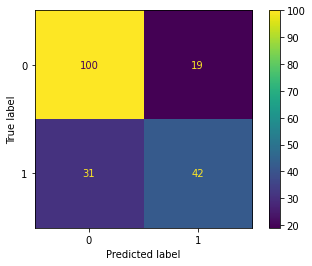

In [24]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_y, test_pred), display_labels=[0,1]).plot();